### Load Libraries

In [1]:
import pandas as pd

### Load Data

In [2]:
df = pd.read_csv("bng.csv")

In [3]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Split Data

In [4]:
X = df.drop('price', axis=1)
y = df['price']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (7120, 107)
Shape of y =  (7120,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (5696, 107)
Shape of y_train =  (5696,)
Shape of X_test =  (1424, 107)
Shape of y_test =  (1424,)


##Decision Tree Regression - ML Model Training

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
regressor = DecisionTreeRegressor(criterion='mse')
regressor.fit(X_train, y_train)

C:\Users\EASY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse')

In [8]:
regressor.score(X_test, y_test)

0.8581405565484932

## Predict the value of Home

In [9]:
#pd.set_option('display.max_columns',5)
print(X_test.iloc[1:3])

print(y_test)

      bath  balcony  total_sqft_int  bhk  price_per_sqft  \
3113   2.0      2.0          1016.0    2     3937.007874   
426    4.0      2.0          1950.0    3     6153.846154   

      area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
3113                              1                        0   
426                               1                        0   

      area_typePlot  Area  availability_Ready To Move  location_Whitefield  \
3113                    0                           1                    0   
426                     0                           1                    0   

      ...  location_Kalena Agrahara  location_Horamavu Agara  \
3113  ...                         0                        0   
426   ...                         0                        0   

      location_Vidyaranyapura  location_BTM 2nd Stage  \
3113                        0                       0   
426                         0                       0   

      location_Hebbal Kemp

In [11]:
print(y_test)
pred = regressor.predict(X_test)
print(pred)

2435     80.00
3113     40.00
426     120.00
1124     79.00
1161     45.00
         ...  
2078     28.34
6855     84.00
4381     32.00
3862     63.00
43      180.00
Name: price, Length: 1424, dtype: float64
[ 83.    39.95 120.   ...  32.82  62.   170.  ]


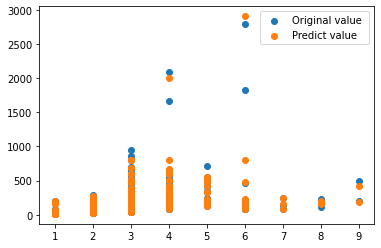

In [65]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.scatter(X_test['bhk'],y_test,label="Original value ")
plt.scatter(X_test['bhk'],pred,label="Predict value ")
plt.legend();
plt.show()
